<a href="https://colab.research.google.com/github/romeroc223/SySistemas2025/blob/main/Ejercicio_taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparación entre Serie de Fourier, TF, DTFT, DFT y FFT



## Serie de Fourier (SF)

-- Representa señales **periódicas** como suma de funciones sinusoidales.
-- **Tres formas**:
  -- **Trigonométrica**:  
    \[
    x(t) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos(n\omega_0 t) + b_n \sin(n\omega_0 t) \right)
    \]
  -- **Exponencial (forma compacta)**:  
    \[
    x(t) = \sum_{n=-\infty}^{\infty} c_n e^{j n \omega_0 t}
    \]
-- Solo aplica a señales **periódicas**.
-- Tiempo: continuo o discreto.
-- Espectro: **discreto**.



## Transformada de Fourier (TF)

-- Extiende la SF a señales **no periódicas**.

\[
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2\pi f t} dt
\]

-- Tiempo: **continuo**.
-- Espectro: **continuo**.
-- Aplica a señales no periódicas.

---

## Transformada de Fourier en Tiempo Discreto (DTFT)

\[
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}
\]

-- Tiempo: **discreto**.
-- Espectro: **continuo y periódico** en \( \omega \).
-- No computable directamente (infinita), usada para análisis teórico.



## Transformada Discreta de Fourier (DFT)

\[
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2\pi k n / N}, \quad k = 0, 1, ..., N-1
\]

-- Tiempo: **discreto y finito**.
-- Espectro: **discreto**.
-- Implementable computacionalmente.
-- Se asume que la señal es periódica de longitud \( N \).


## Fast Fourier Transform (FFT)

-- Algoritmo eficiente para calcular la DFT.
-- Reduce complejidad de:

\[
O(N^2) \rightarrow O(N \log_2 N)
\]

-- Utiliza recursividad (por ejemplo, algoritmo de Cooley-Tukey).
-- Imprescindible en procesamiento digital en tiempo real.



## Resumen Comparativo

| Transformada / Serie | Tiempo | Espectro | Tipo de señal     | Periodicidad |
|----------------------|--------|----------|-------------------|--------------|
| Serie de Fourier     | Cont. / Disc. | Discreto | Periódica         | Sí           |
| Transformada Fourier | Continuo | Continuo | No periódica      | No           |
| DTFT                 | Discreto | Continuo (periódico) | No periódica | No           |
| DFT                  | Discreto (finito) | Discreto | Finita / periódica | Sí (por definición) |
| FFT                  | Discreto (finito) | Discreto | Finita / periódica | Sí (más eficiente)  |

---

## Utilidad práctica

-- **Serie de Fourier**: análisis de señales periódicas (audio, circuitos).
-- **TF / DTFT**: análisis teórico de señales no periódicas.
-- **DFT**: procesamiento digital real de señales finitas.
-- **FFT**: implementación eficiente de la DFT para análisis rápido.



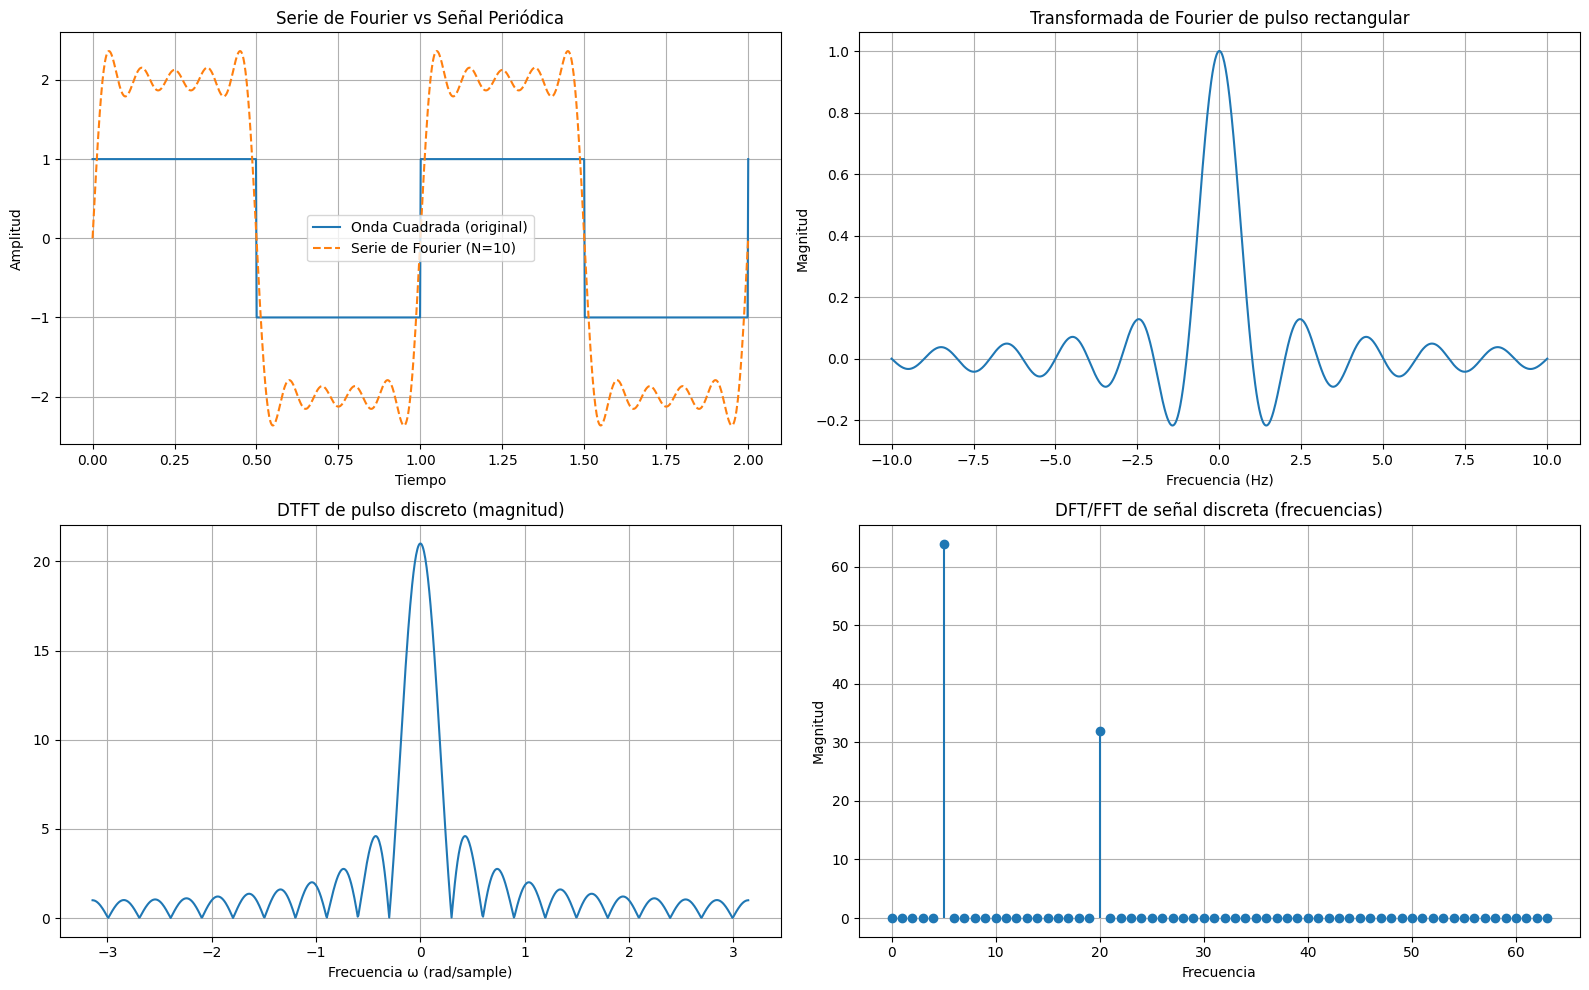

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fft, fftfreq

# 🔹 PARTE 1: Señal periódica y Serie de Fourier (aproximación)

# Parámetros
T = 1           # Periodo
f0 = 1 / T      # Frecuencia fundamental
t = np.linspace(0, 2*T, 1000)  # Tiempo

# Señal periódica: onda cuadrada
def square_wave(t):
    return np.where(np.mod(t, T) < T/2, 1, -1)

x_t = square_wave(t)

# Aproximación de Serie de Fourier (exponencial)
N = 10  # Número de armónicos
x_sf = np.zeros_like(t, dtype=np.complex128)

for n in range(-N, N+1):
    if n == 0:
        cn = 0  # El coeficiente de DC para onda cuadrada simétrica es 0
    else:
        cn = 2 / (1j * np.pi * n) * (1 - np.cos(n * np.pi))
    x_sf += cn * np.exp(1j * 2 * np.pi * n * f0 * t)

# 🔹 PARTE 2: Señal no periódica - Transformada de Fourier (aproximación)

# Señal no periódica: pulso rectangular
def rect(t):
    return np.where(np.abs(t) <= 0.5, 1, 0)

t2 = np.linspace(-5, 5, 1000)
x2 = rect(t2)

# Transformada de Fourier analítica: sinc
frequencies = np.linspace(-10, 10, 1000)
X_f = np.sinc(frequencies)

# 🔹 PARTE 3: Señal discreta y DTFT

n = np.arange(-50, 51)
x_disc = np.where(np.abs(n) <= 10, 1, 0)
omega = np.linspace(-np.pi, np.pi, 1000)
X_dtft = np.array([np.sum(x_disc * np.exp(-1j * w * n)) for w in omega])

# 🔹 PARTE 4: DFT y FFT

# Secuencia finita
N = 128
n_dft = np.arange(N)
x_dft = np.sin(2 * np.pi * 5 * n_dft / N) + 0.5 * np.sin(2 * np.pi * 20 * n_dft / N)

# DFT y FFT
X_dft = np.fft.fft(x_dft)
freqs_dft = np.fft.fftfreq(N, d=1/N)

# 🔹 GRAFICAR RESULTADOS

plt.figure(figsize=(16, 10))

# Serie de Fourier
plt.subplot(2, 2, 1)
plt.plot(t, x_t, label='Onda Cuadrada (original)')
plt.plot(t, x_sf.real, '--', label='Serie de Fourier (N=10)')
plt.title('Serie de Fourier vs Señal Periódica')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# TF (sinc)
plt.subplot(2, 2, 2)
plt.plot(frequencies, X_f)
plt.title('Transformada de Fourier de pulso rectangular')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()

# DTFT
plt.subplot(2, 2, 3)
plt.plot(omega, np.abs(X_dtft))
plt.title('DTFT de pulso discreto (magnitud)')
plt.xlabel('Frecuencia ω (rad/sample)')
plt.grid()

# DFT / FFT
plt.subplot(2, 2, 4)
plt.stem(freqs_dft[:N//2], np.abs(X_dft[:N//2]), basefmt=" ")
plt.title('DFT/FFT de señal discreta (frecuencias)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid()

plt.tight_layout()
plt.show()
